In [10]:
import pandas as pd
import scanpy as sc

In [11]:
data_path = r'/home/liuyq/data/ar_data/filtered_gene_bc_matrices/hg19'

In [19]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

/home/liuyq/anaconda3/envs/dl/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-28 16:59:31.879556: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-28 16:59:31.897168: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-28 16:59:32.270316: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find Tensor

scanpy==1.10.0 anndata==0.10.6 umap==0.5.6 numpy==1.24.3 scipy==1.13.0 pandas==2.2.1 scikit-learn==1.4.1.post1 statsmodels==0.14.1 pynndescent==0.5.12


In [20]:
adata = sc.read_10x_mtx(
    data_path,  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,  # write a cache file for faster subsequent reading
)

... reading from cache file cache/home-liuyq-data-ar_data-filtered_gene_bc_matrices-hg19-matrix.h5ad


In [21]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

normalizing counts per cell
    finished (0:00:00)


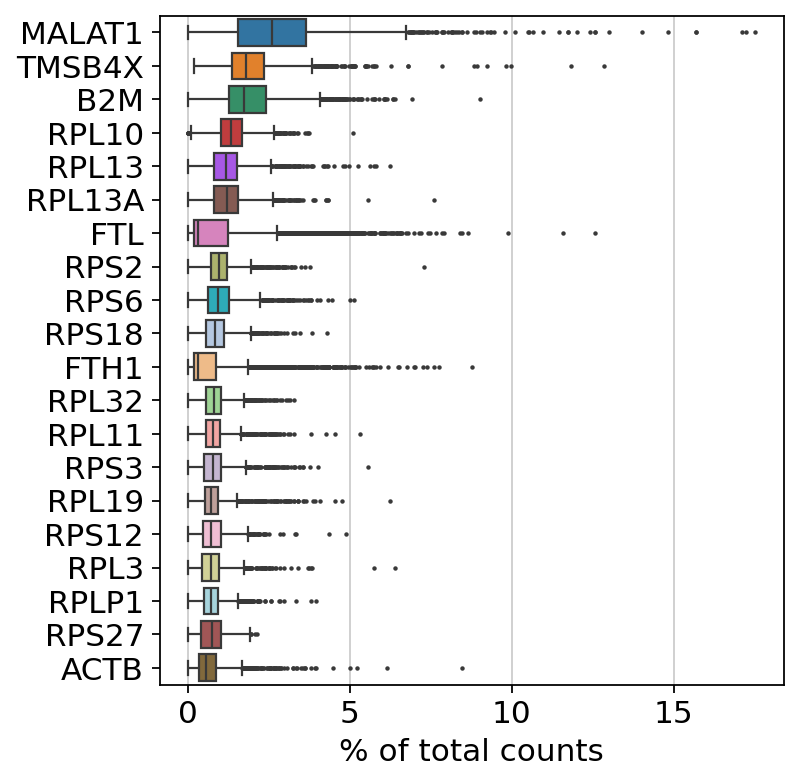

In [22]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [23]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [24]:
adata

AnnData object with n_obs × n_vars = 2700 × 13714
    obs: 'n_genes'
    var: 'gene_ids', 'n_cells'

In [25]:
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

/home/liuyq/anaconda3/envs/dl/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


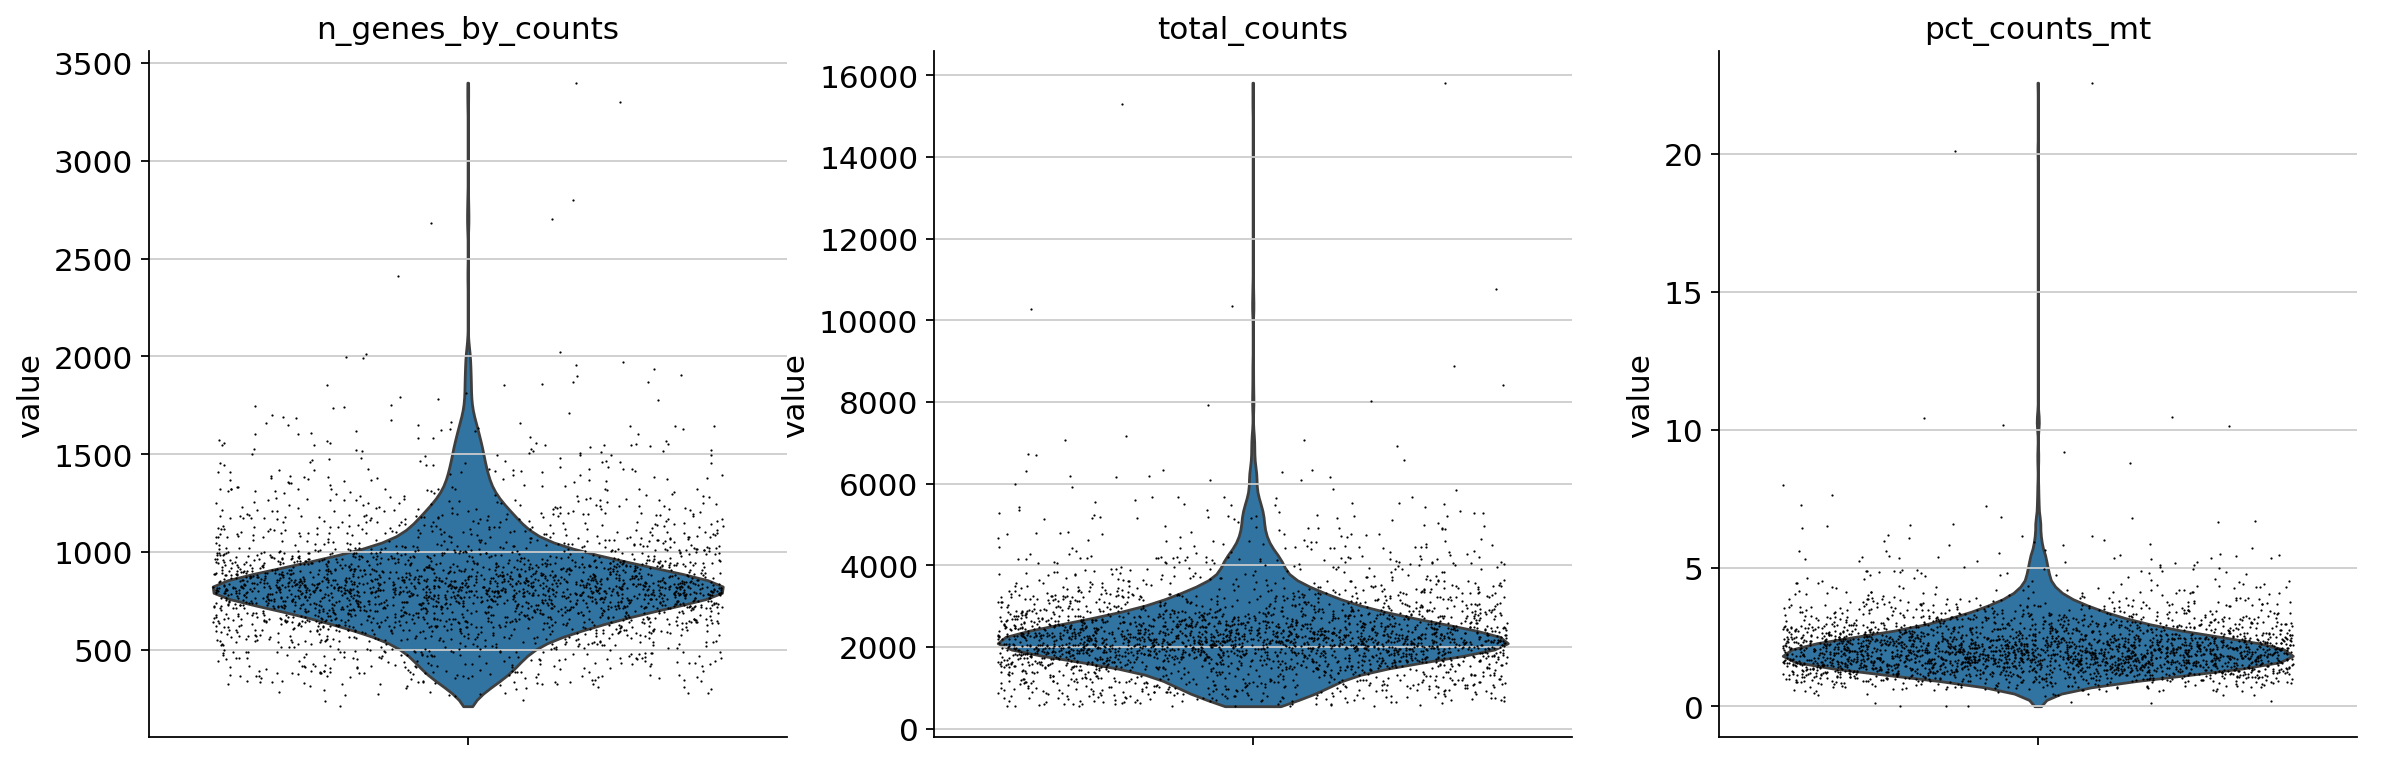

In [26]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

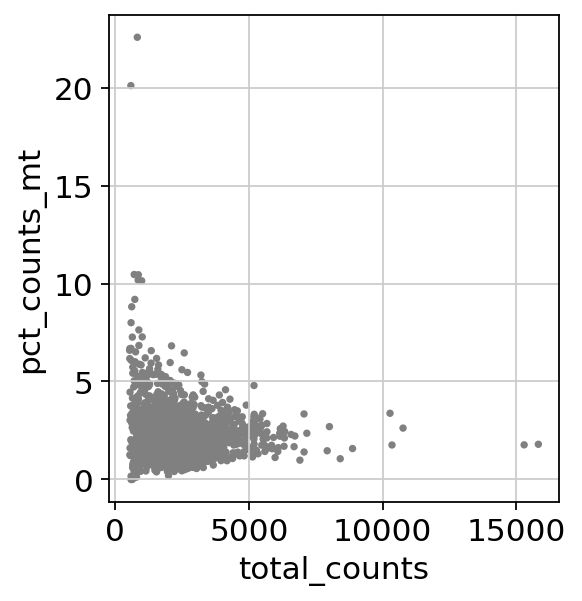

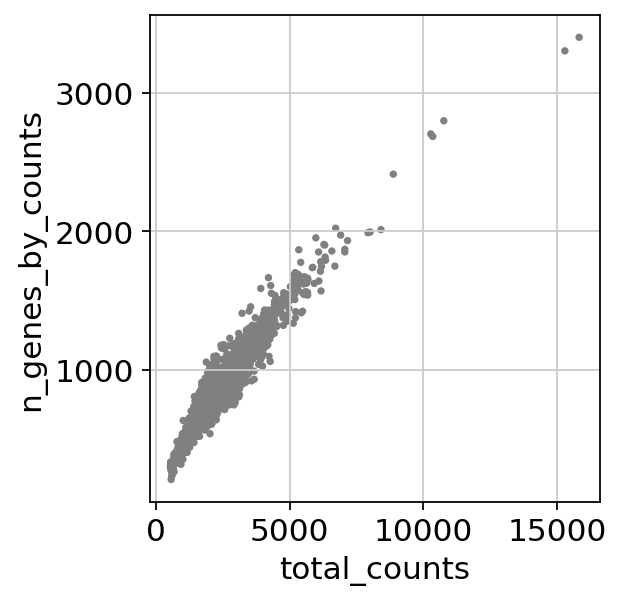

In [27]:
sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")

In [28]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

In [29]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [30]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [31]:
sc.pp.log1p(adata)

In [32]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


In [33]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [34]:
adata.uns['hvg']

{'flavor': 'seurat'}

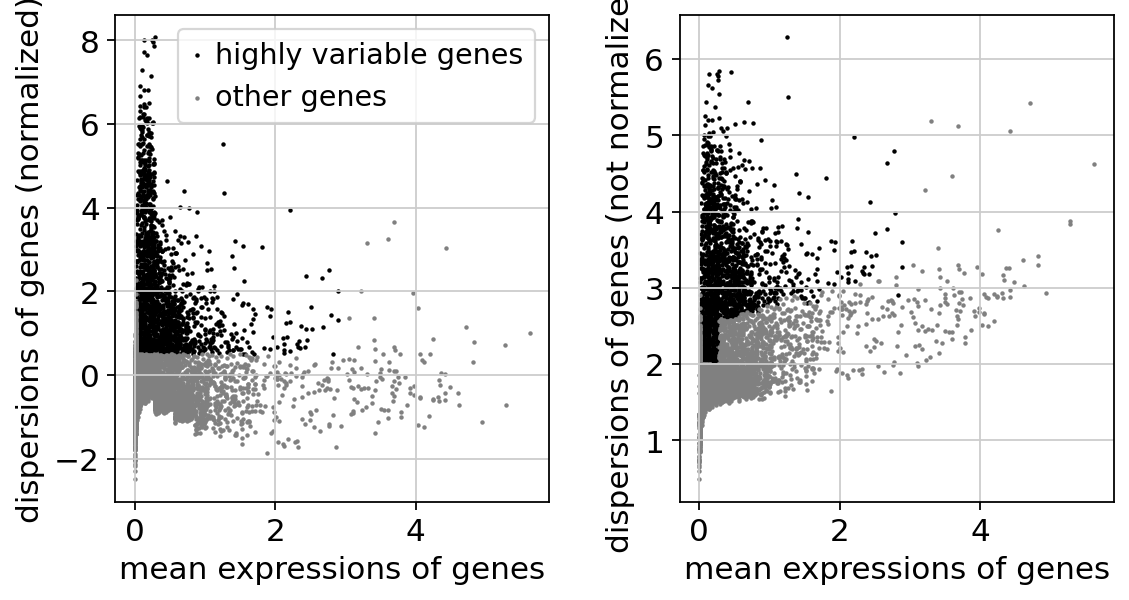

In [35]:
sc.pl.highly_variable_genes(adata)

In [36]:
adata.var.highly_variable

AL627309.1       False
AP006222.2       False
RP11-206L10.2    False
RP11-206L10.9    False
LINC00115        False
                 ...  
AC145212.1       False
AL592183.1       False
AL354822.1       False
PNRC2-1          False
SRSF10-1         False
Name: highly_variable, Length: 13714, dtype: bool

In [37]:
type(adata.var.highly_variable)

pandas.core.series.Series

In [38]:
genes = adata.var.highly_variable.index[adata.var.highly_variable]

In [39]:
len(genes)

1838

In [41]:
sc.tl.pca(adata, svd_solver="arpack")

computing PCA
    with n_comps=50
    finished (0:00:00)


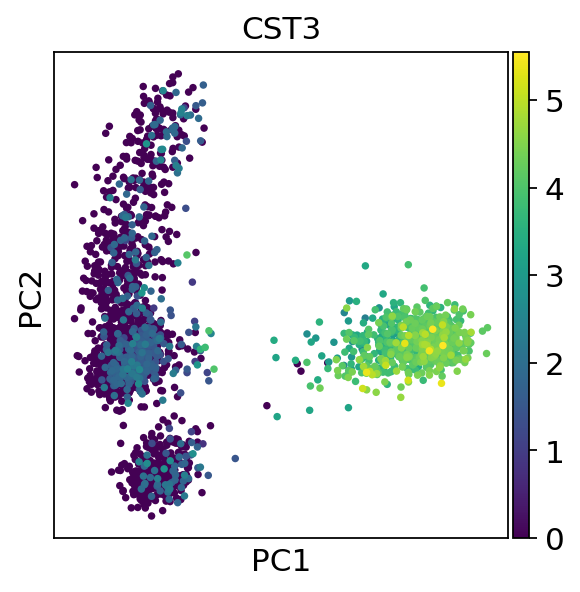

In [42]:
sc.pl.pca(adata, color="CST3")

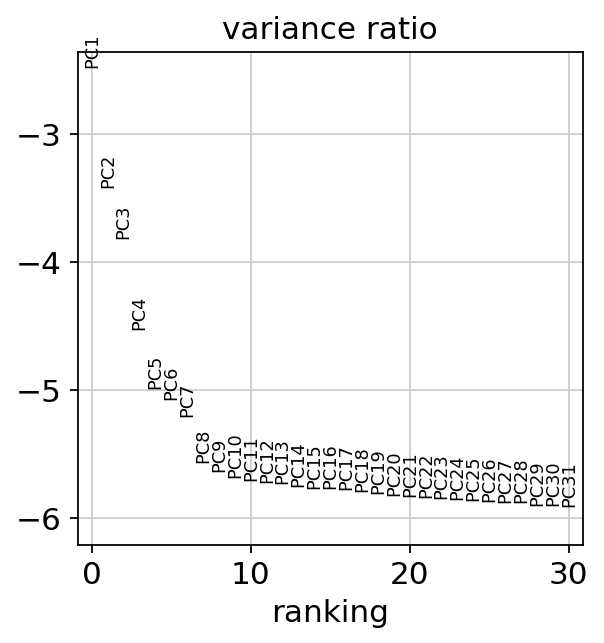

In [43]:
sc.pl.pca_variance_ratio(adata, log=True)

In [44]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [45]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [46]:
sc.tl.paga(adata)
sc.pl.paga(adata, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata, init_pos='paga')

ValueError: You need to run `tl.leiden` or `tl.louvain` to compute community labels, or specify `groups='an_existing_key'`

In [47]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:01)


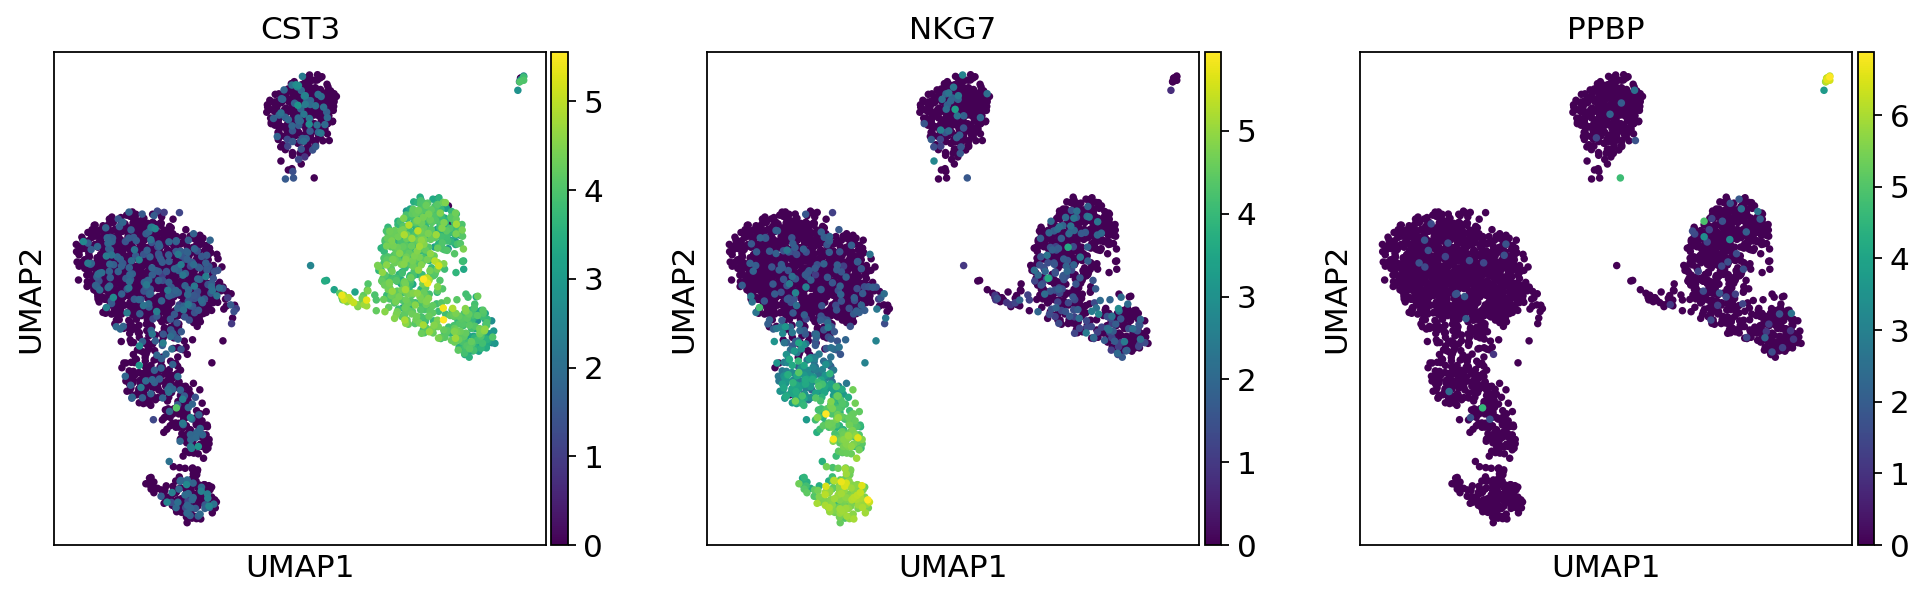

In [48]:
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"])

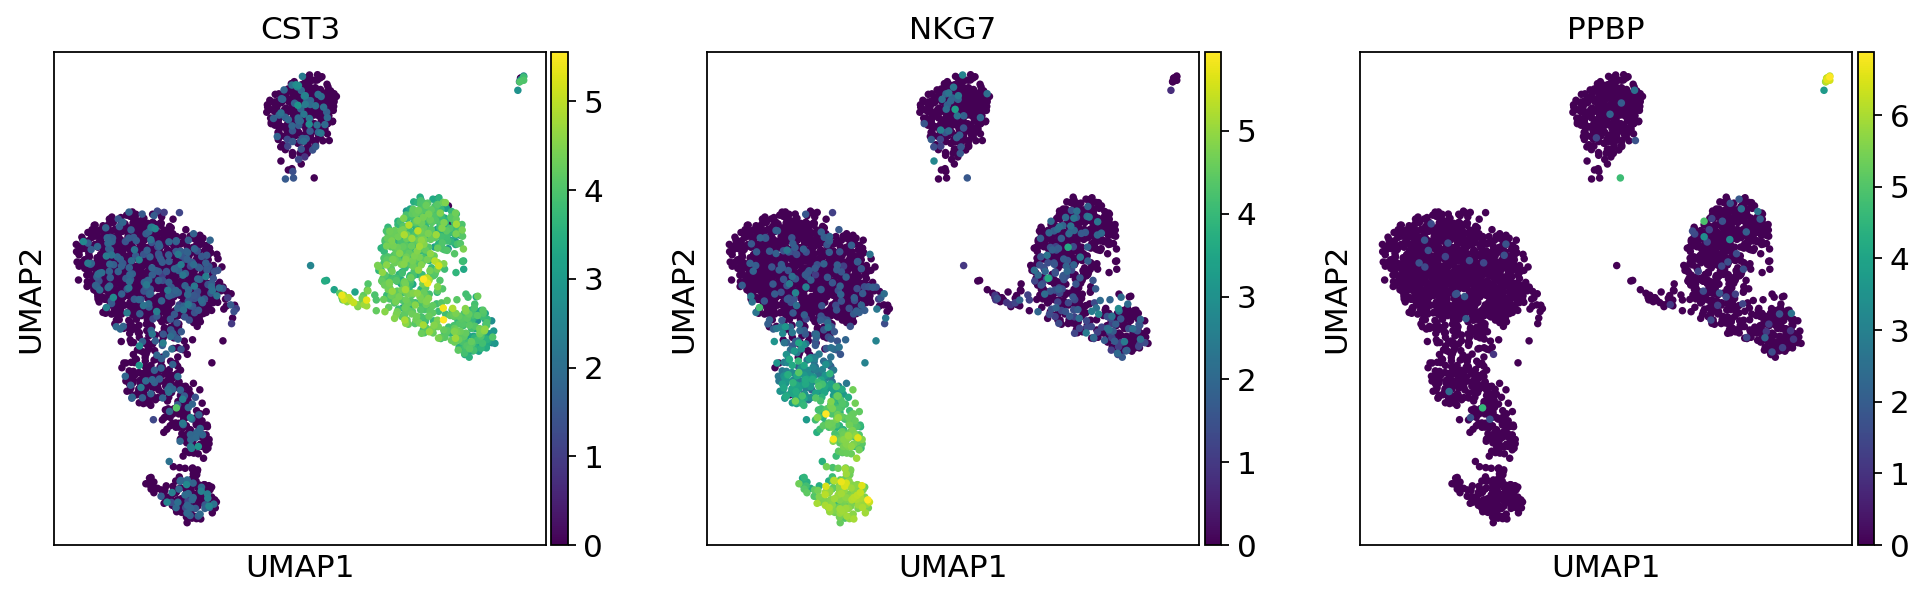

In [49]:
sc.pl.umap(adata, color=["CST3", "NKG7", "PPBP"], use_raw=False)

In [51]:
sc.tl.leiden(
    adata,
    resolution=0.9,
    random_state=0,
    flavor="igraph",
    n_iterations=2,
    directed=False,
)

running Leiden clustering
    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


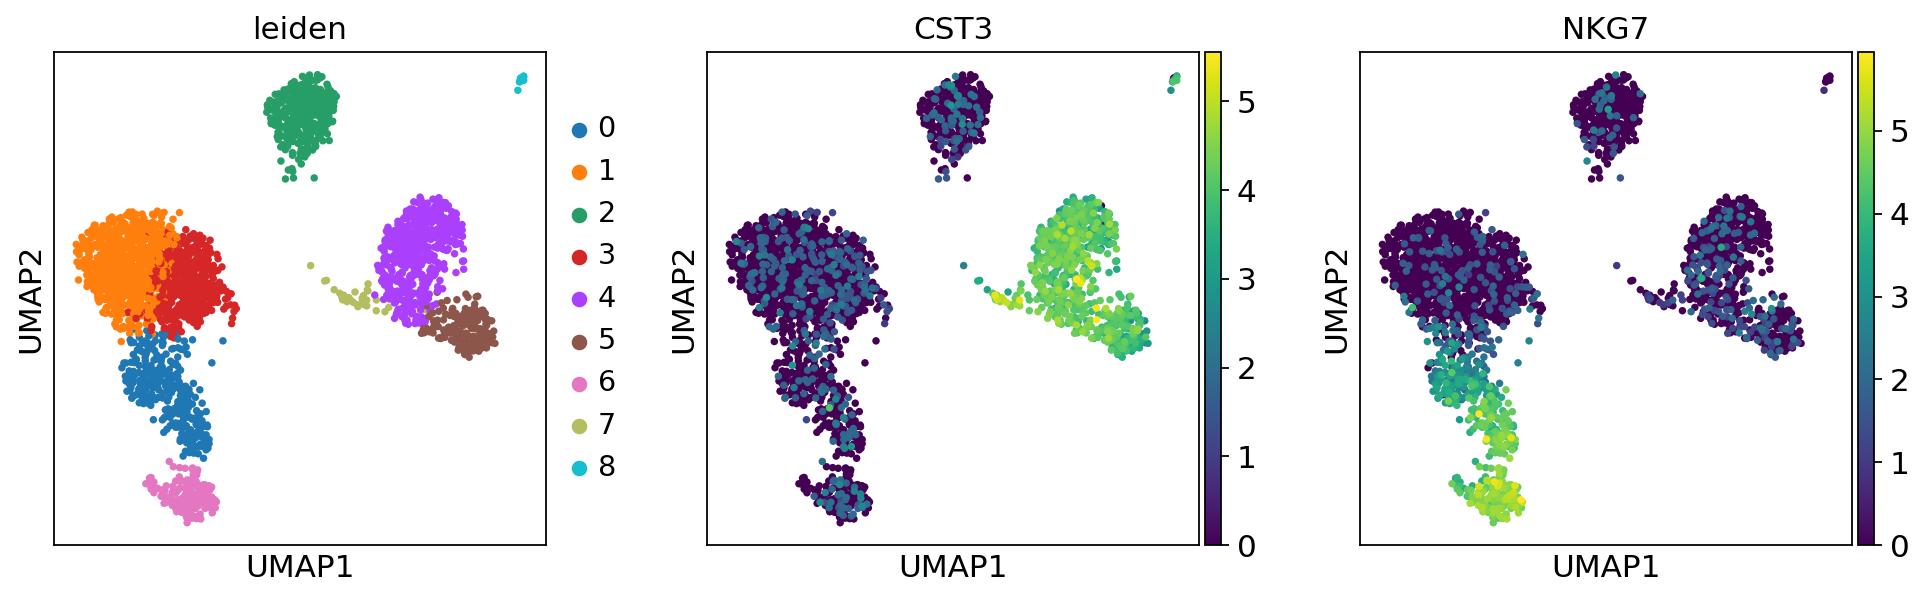

In [52]:
sc.pl.umap(adata, color=["leiden", "CST3", "NKG7"])

In [53]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


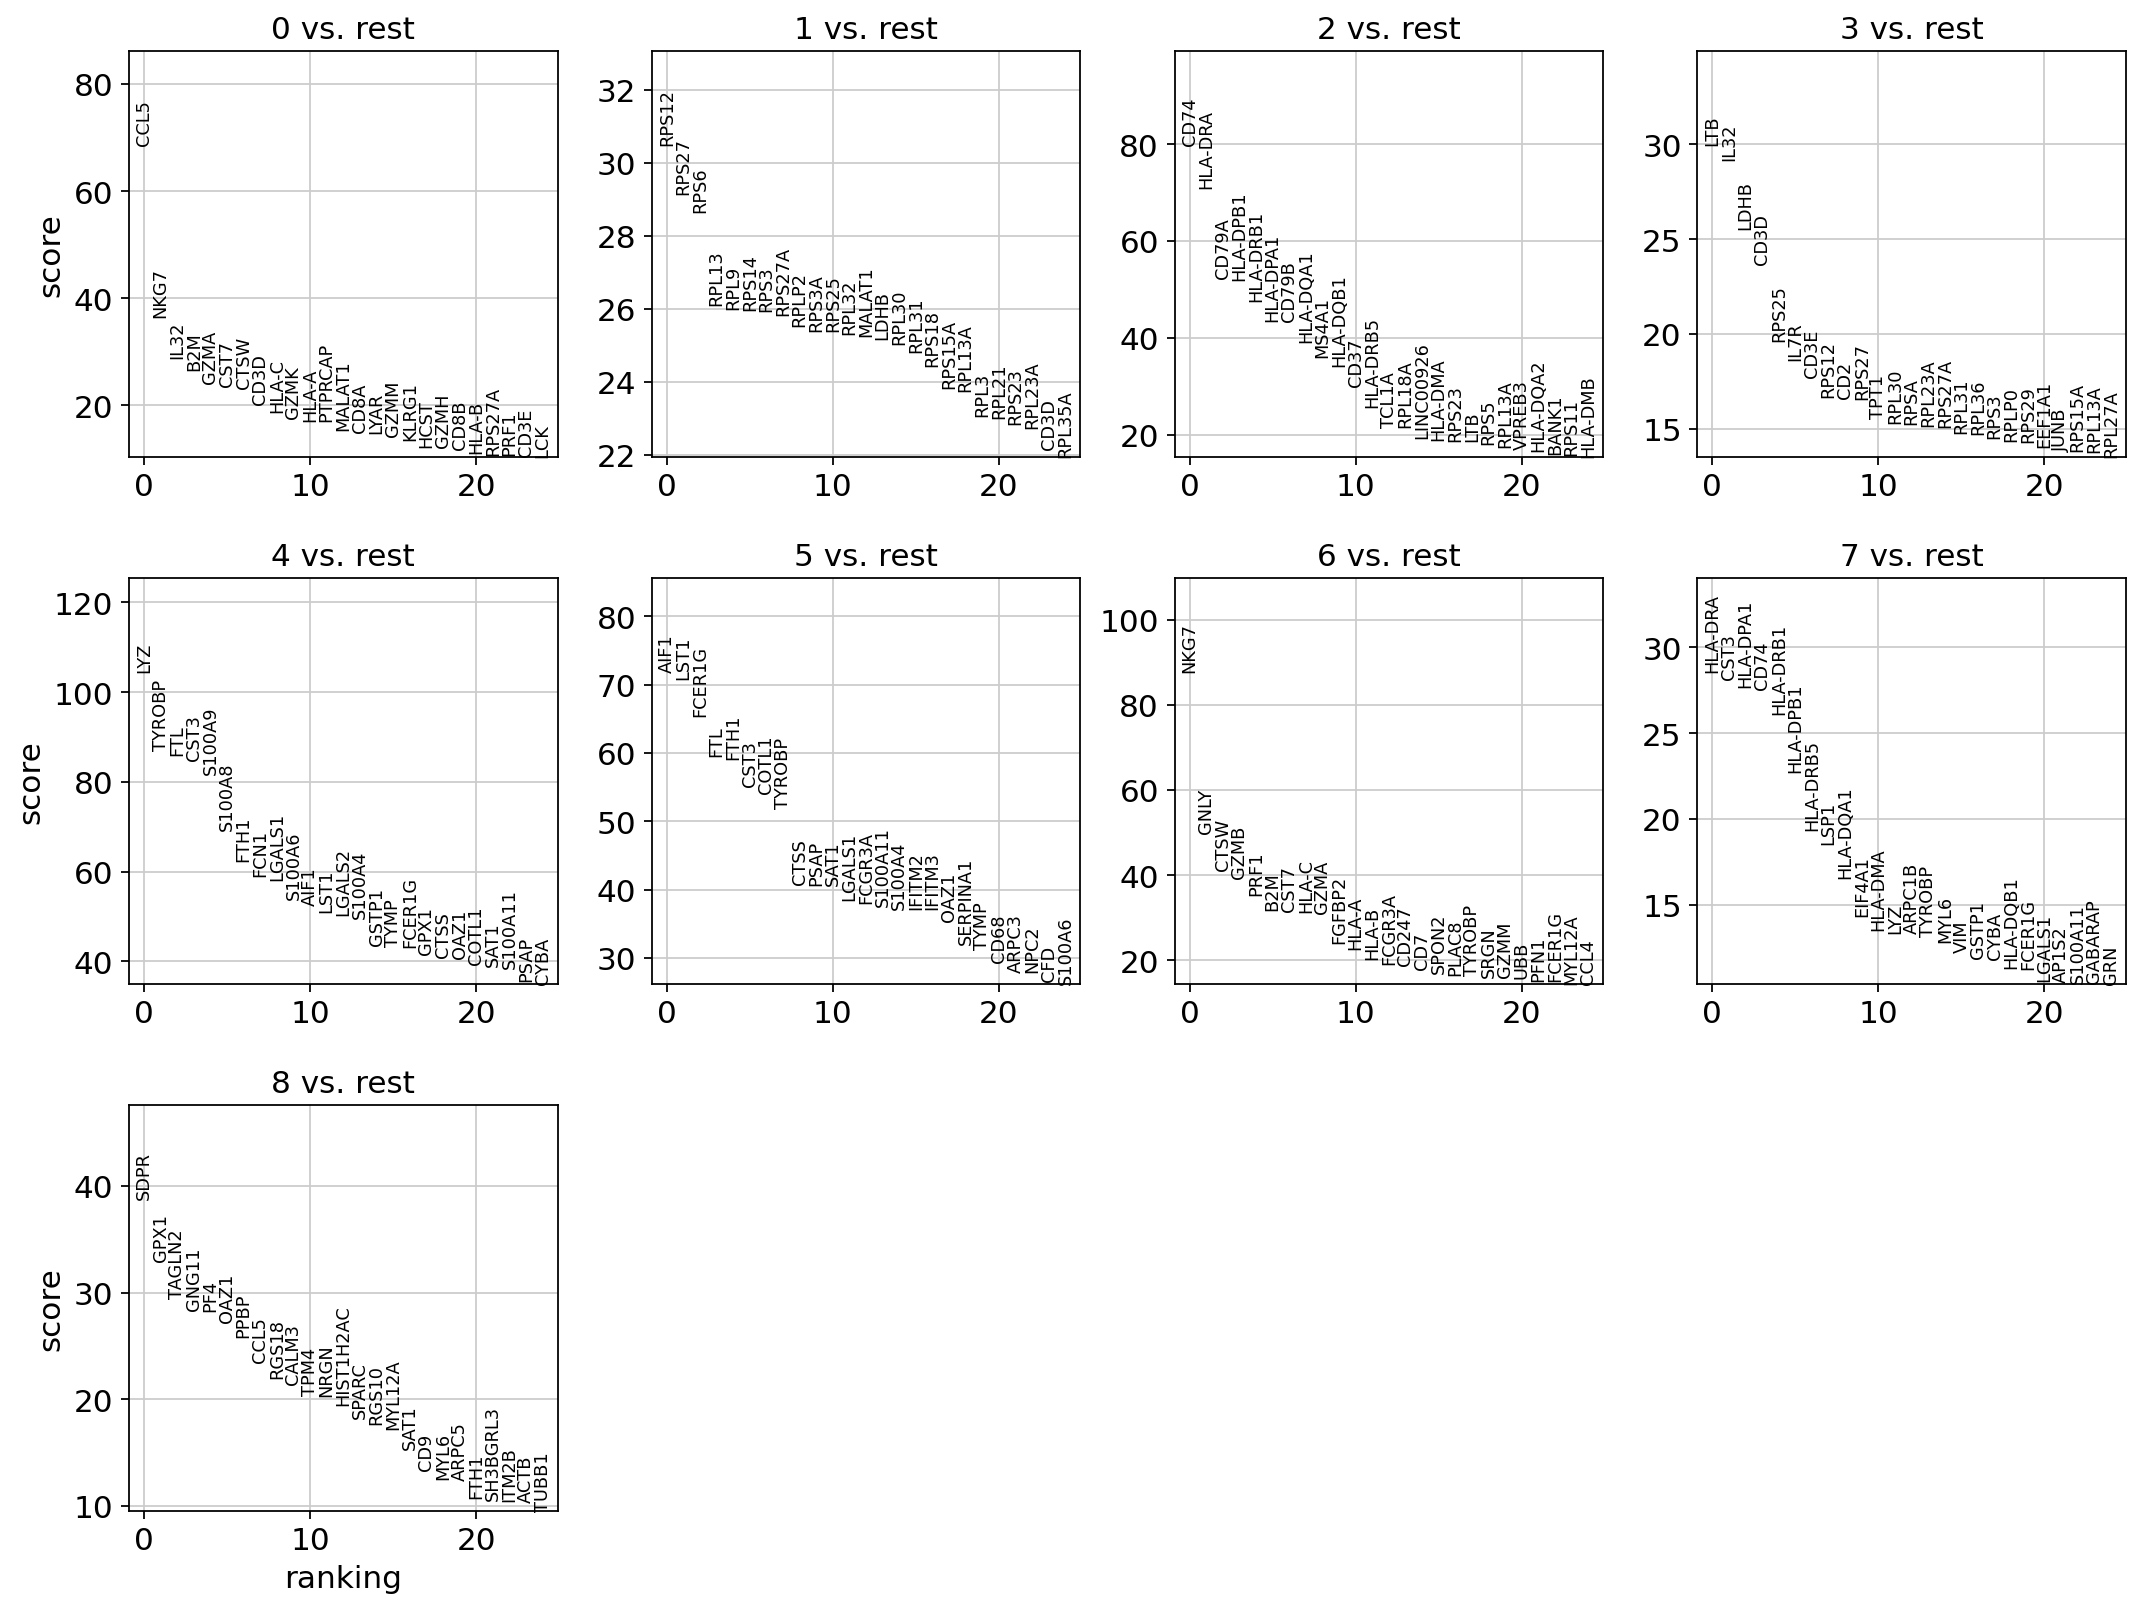

In [59]:
sc.tl.rank_genes_groups(adata, "leiden", method="t-test")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [54]:
len(adata.obs["leiden"])

2638

In [57]:
type(adata.obs["leiden"])

pandas.core.series.Series

In [58]:
adata.obs["leiden"][:10]

AAACATACAACCAC-1    0
AAACATTGAGCTAC-1    2
AAACATTGATCAGC-1    3
AAACCGTGCTTCCG-1    4
AAACCGTGTATGCG-1    6
AAACGCACTGGTAC-1    3
AAACGCTGACCAGT-1    0
AAACGCTGGTTCTT-1    0
AAACGCTGTAGCCA-1    0
AAACGCTGTTTCTG-1    5
Name: leiden, dtype: category
Categories (9, object): ['0', '1', '2', '3', ..., '5', '6', '7', '8']

In [60]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [61]:
sc.settings.verbosity = 2  # reduce the verbosity

In [62]:
results_file

NameError: name 'results_file' is not defined

In [63]:
result = adata.uns["rank_genes_groups"]

In [65]:
type(result)

dict

In [66]:
len(result)

6

In [67]:
result.keys()

dict_keys(['params', 'names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges'])

In [69]:
result["names"]

rec.array([('CCL5', 'RPS12', 'CD74', 'LTB', 'LYZ', 'AIF1', 'NKG7', 'HLA-DRA', 'SDPR'),
           ('NKG7', 'RPS27', 'HLA-DRA', 'IL32', 'TYROBP', 'LST1', 'GNLY', 'CST3', 'GPX1'),
           ('IL32', 'RPS6', 'CD79A', 'LDHB', 'FTL', 'FCER1G', 'CTSW', 'HLA-DPA1', 'TAGLN2'),
           ...,
           ('LY86', 'HLA-DPA1', 'IL32', 'FCER1G', 'LTB', 'IL32', 'LY86', 'GZMA', 'HINT1'),
           ('LGALS2', 'HLA-DRB5', 'S100A4', 'HLA-DRA', 'MALAT1', 'PTPRCAP', 'IFI30', 'CD3G', 'ZFP36L2'),
           ('S100A8', 'HLA-DRB1', 'CD3D', 'TYROBP', 'PTPRCAP', 'CD3D', 'CD3D', 'PIK3IP1', 'RPL38')],
          dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O'), ('6', 'O'), ('7', 'O'), ('8', 'O')])

In [85]:
len(result["params"])

6

In [92]:
result["pvals"][1][1]

1.6609501965368195e-158

In [94]:
result["names"]["1"]

array(['RPS12', 'RPS27', 'RPS6', ..., 'HLA-DPA1', 'HLA-DRB5', 'HLA-DRB1'],
      dtype=object)

In [88]:
#get all marker genes for all clusters
groups = result["names"].dtype.names
marker_genes = pd.DataFrame(
    {group + "_" + key[:1]: result[key][group]
     for group in groups
     for key in ["names", "pvals"]
    }
)


In [97]:
groups.unique()

AttributeError: 'tuple' object has no attribute 'unique'

In [90]:
marker_genes.shape

(13714, 18)

In [96]:
set(groups)

{'0', '1', '2', '3', '4', '5', '6', '7', '8'}

In [77]:
adata

AnnData object with n_obs × n_vars = 2638 × 13714
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'gene_ids', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'neighbors', 'pca', 'umap', 'leiden', 'leiden_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [100]:
set(adata.obs["leiden"])

{'0', '1', '2', '3', '4', '5', '6', '7', '8'}

In [101]:
marker_genes

,0_n,0_p,1_n,1_p,2_n,2_p,3_n,3_p,4_n,4_p,5_n,5_p,6_n,6_p,7_n,7_p,8_n,8_p
0,CCL5,3.264197e-272,RPS12,2.862824e-171,CD74,0.000000e+00,LTB,4.335551e-146,LYZ,0.000000e+00,AIF1,1.909674e-265,NKG7,6.984043e-223,HLA-DRA,1.339096e-29,SDPR,3.855269e-13
1,NKG7,5.256815e-134,RPS27,1.660950e-158,HLA-DRA,0.000000e+00,IL32,8.648598e-139,TYROBP,0.000000e+00,LST1,6.898182e-221,GNLY,1.177474e-100,CST3,1.907345e-28,GPX1,5.144346e-13
2,IL32,6.884423e-115,RPS6,2.605750e-151,CD79A,4.611455e-169,LDHB,1.300656e-112,FTL,0.000000e+00,FCER1G,1.418082e-213,CTSW,1.852869e-96,HLA-DPA1,6.381930e-28,TAGLN2,1.691074e-12
3,B2M,8.461360e-103,RPL13,2.486416e-130,HLA-DPB1,9.216229e-256,CD3D,5.594428e-97,CST3,0.000000e+00,FTL,5.715254e-234,GZMB,8.484605e-84,CD74,5.864051e-29,GNG11,1.200776e-11
4,GZMA,1.117882e-78,RPL9,5.288713e-130,HLA-DRB1,1.237013e-231,RPS25,1.543418e-76,S100A9,0.000000e+00,FTH1,7.108113e-210,PRF1,1.034944e-77,HLA-DRB1,1.035353e-26,PF4,1.248850e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13709,FCER1G,8.626533e-79,TYROBP,6.148059e-186,HCST,9.866386e-140,HLA-DRB5,2.143199e-115,CD3D,4.193423e-226,CD7,1.366835e-80,SLC7A7,1.138954e-81,LEF1,5.987296e-101,PSME2,0.000000e+00
13710,AIF1,2.436809e-84,HLA-DRA,4.468051e-187,GIMAP7,1.803583e-157,HLA-DRB1,1.657689e-112,IL32,4.090262e-253,RPL13,1.310829e-59,HLA-DRB5,7.221702e-62,PRKCQ-AS1,3.164222e-103,PTPRCAP,0.000000e+00
13711,LY86,1.122342e-92,HLA-DPA1,8.159218e-190,IL32,6.346602e-165,FCER1G,1.354441e-124,LTB,7.520643e-227,IL32,5.375178e-85,LY86,4.298042e-83,GZMA,2.954108e-117,HINT1,0.000000e+00
13712,LGALS2,1.853685e-94,HLA-DRB5,3.378029e-192,S100A4,1.638891e-136,HLA-DRA,2.838210e-125,MALAT1,2.334633e-217,PTPRCAP,2.411084e-87,IFI30,2.296277e-98,CD3G,7.964537e-137,ZFP36L2,0.000000e+00
